# Applied Statistics - Project

**Author: Cecilia Pastore**

---

# Table of Contents
* [Introduction](#I)
* [1.  Import the needed library](#1)
* [2. Download and save the dataset in the repository](#2)
* [3. PlantGrowth dataset - data exploration and visualization](#3)
    * [3.1 PlantGrowth dataset - Introduction](#3_1)
    * [3.2 PlantGrowth dataset - Data exploration and cleaning](#3_2)
    * [3.3 PlantGrowth dataset - Data visualization](#3_3)
* [4. T-test](#4)
    * [4.1 T-test - definition and general assumptions](#4_1)
    * [4.2 Indipendent T-test](#4_2)
        * [4.2.1 Indipendent T-tes: assumptions](#4_2_1)
        * [4.2.2 Indipendent T-tes: How it works](#4_2_2)
* [5. Perform the indipendent T-test](#5)
    * [5.1 Check the assumptions](#5_1)
        * [5.1.1: Assumption 4: No Significant Outliers](#5_1_1)
        * [5.1.2 Assumption 5: Normality](#5_1_2)
        * [5.1.3 Assumption 6: Homogeneity of Variances](#5_1_3)
    * [5.2. Perform the test](#5_2)
* [6. ANOVA Test](#6)
    * [6.1 ANOVA: definition and general assusmptions](#6_1)
    * [6.2 ANOVA: Check the Assumption Satisfaction](#6_2)
    * [6.3 ANOVA: Test execution](#6_3)
    * [6.4 ANOVA: Tukey's HSD Test](#6_4)
* [7. 7. The Benefits of ANOVA Over Multiple T-Tests for Group Comparison Analysis](#7)
* [References](#r)

### **INTRODUCTION** <a class="anchor" id="I"></a>

This Jupyter Notebook contains the work completed as part of the **Applied Statistics** module, which is a core component of the Higher Diploma in Science in Computing in Data Analytics program at the Atlantic Technological University (ATU) of Galway. The project aims to apply statistical techniques to real-world data in order to derive meaningful insights and make informed decisions. Through the analysis presented in this notebook, various statistical methods, including data visualization and statistical tests are employed to demonstrate the practical application of statistical concepts in the field of data analytics.

**Project assignement**

> Complete the project in a single notebook called project.ipynb in your repository. The same style should be used as detailed above: explanations in Markdown and code comments, clean code, and regular commits. Use plots as appropriate.
>
> In this project, you will analyze the PlantGrowth R dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables: a treatment group and the weight of plants within those groups.
>
>Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. In doing this, you should:
>
>1. Download and save the dataset to your repository.
>2. Describe the dataset in your notebook.
>3. Describe what a t-test is, how it works, and what the assumptions are.
>4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.
>5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2
>6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

### **1. Import the needed library** <a class="anchor" id="1"></a>

As start the needed libraries for this project need to be imported. Here's a quick overview of what each of these libraries and modules is typically used for:

- **pandas**: Used for data manipulation and analysis. It's a powerful tool for handling structured data in the form of DataFrames [[1]](https://pandas.pydata.org/pandas-docs/stable/).

- **matplotlib.pyplot**: A plotting library used for creating static, animated, and interactive visualizations in Python. `plt` is commonly used for creating charts like line plots, bar charts, histograms, etc [[2]](https://matplotlib.org/stable/contents.html).

- **seaborn**: Built on top of `matplotlib`, Seaborn is used for creating more attractive and informative statistical graphics. It's especially good for visualizing distributions and relationships between variables [[3]](https://seaborn.pydata.org/).

- **scipy.stats**: A submodule of SciPy used for statistical functions. For example, it includes tests like t-tests, chi-square tests, and others [[4]](https://docs.scipy.org/doc/scipy/reference/stats.html).

- **os**: Provides a way to interact with the operating system, useful for file and directory manipulation [[5]](https://docs.python.org/3/library/os.html).

- **requests**: A simple HTTP library for making web requests (e.g., downloading data from APIs or websites) [[6]](https://docs.python-requests.org/en/master/).

- **numpy**: A core library for numerical operations in Python, often used for array manipulation, matrix operations, and mathematical computation [[7]](https://numpy.org/doc/stable/).

- **tabulate**: A library for generating pretty tables from data, often used for displaying data in a tabular format in the console or in reports [[8]](https://pypi.org/project/tabulate/).

- **statsmodels.stats.multicomp**: Provides tools for performing statistical analysis like post-hoc tests. The `pairwise_tukeyhsd` function is commonly used for post-hoc pairwise comparisons in ANOVA [[9]](https://www.statsmodels.org/stable/index.html).

In [1]:
#import needed libraries 

# Importing pandas library for data manipulation and analysis
import pandas as pd


# Importing pyplot from matplotlib to create various types of plots/visualizations
import matplotlib.pyplot as plt

# Importing seaborn for advanced data visualization built on top of matplotlib
import seaborn as sns

# Importing the stats submodule from scipy for performing statistical tests
import scipy.stats as stats

# Importing os to interact with the operating system, useful for file and directory manipulation
import os

# Importing requests to make HTTP requests, typically for fetching data from APIs or websites
import requests

# Importing numpy for numerical operations, particularly with arrays and matrices
import numpy as np

# Importing tabulate for creating pretty-printable tables from data
from tabulate import tabulate

# Importing pairwise_tukeyhsd from statsmodels to perform Tukey's post-hoc tests for multiple comparisons
from statsmodels.stats.multicomp import pairwise_tukeyhsd


### **2. Download and save the dataset in the repository** <a class="anchor" id="2"></a>

Focus of this section is donload the dataset [PlantGrowth R dataset [10]](https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv) and save it in the repository. 

In order to perform the task first the variable `url` (which contains the URL from where the dataset can be downloaded) and the variable `file_name`( which contains the name of the dataset) are defined.

The code then checks if the dataset exists in the path where the repository is saved using the function `os.path.exists()` [[11]](https://www.geeksforgeeks.org/python-os-path-exists-method/). If the file exists, a message is printed indicating this.

If the file doesn't exist:
- An HTTP GET request is sent to download the CSV file from the given URL using the `requests.get()` metho; as inspired by [andrewbeatty_wsaa-course-material_Lab04.1 [12]](https://github.com/andrewbeattycourseware/wsaa-course-material/blob/main/labs/Lab04.1%20requests.pdf) [[13]](https://requests.readthedocs.io/en/latest/user/quickstart/#make-a-request).
- The request status is checked with `response.status_code` [[14]](https://www.geeksforgeeks.org/response-status_code-python-requests/).
- If the request is successful (HTTP status code 200), the file content is written to a local file `PlantGrowth.csv` using `open` and binary write mode 'wb'; as inspired by [andrewbeatty_pands-course-material_files [15]](https://github.com/andrewbeattycourseware/pands-course-material/blob/main/jupyternotebooks/topic07-files.ipynb).



In [2]:
# Define the dataset URL and the file name
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv"
file_name = "PlantGrowth.csv"
data_folder = "data"  # Folder where you want to save the dataset

# Check if the 'data' folder exists, create it if it doesn't
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# Define the full path for the file
file_path = os.path.join(data_folder, file_name)

# Check if the file already exists in the 'data' folder
if not os.path.isfile(file_path):
    # If the file does not exist, download the dataset
    response = requests.get(url)
    # Check if the request was successful
    if response.status_code == 200:
        # Save the content to a file
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"File '{file_name}' downloaded successfully to '{data_folder}'.")
    else:
        print(f"Failed to download the file. HTTP Status code: {response.status_code}")
else:
    print(f"File '{file_name}' already exists in the '{data_folder}' folder.")

File 'PlantGrowth.csv' already exists in the 'data' folder.


### **3. PlantGrowth dataset - data exploration and visualization** <a class="anchor" id="3"></a>

#### **3.1 PlantGrowth dataset – Introduction** <a id="section_3_1"></a>

The PlantGrowth dataset is a dataset commonly used in R and statistics to analyze the effects of different treatments on plant growth [[16]](https://www.cliffsnotes.com/tutors-problems/Computer-Science/48544301-The-PlantGrowth-dataset-in-R-contains-information-from-an/). It contains the following columns:

1. **weight**: The weight of the plants.
2. **group**: The treatment group to which the plant belongs. There three levels in this column:
    - **Ctrl**: Control group (no treatment)
    - **Trt1**: Treatment group 1
    - **Trt2**: Treatment group 2

The dataset has a simple structure, with the goal of studying how different treatments affect the weight of the plants. The dataset has 30 rows, 10 for each group of treataments, with each row representing a plant and its corresponding weight and treatment group.

#### **3.2 PlantGrowth dataset - Data exploration and cleaning** <a id="section_3_2"></a>

To start, we can create a pandas DataFrame for the dataset [[17]](https://www.datacamp.com/tutorial/pandas-read-csv). After loading the data, we drop the column `rownames` as it is not relevant for the analysis.

In [3]:
# Read the data from the CSV file (PlantGrowth.csv) into a pandas DataFrame
# Reference: https://www.datacamp.com/tutorial/pandas-read-csv
df_plant_growth = pd.read_csv('data/PlantGrowth.csv')

# Drop the 'rownames' column from the DataFrame
# Reference: https://www.w3schools.com/python/pandas/ref_df_drop.asp
df_plant_growth = df_plant_growth.drop('rownames', axis='columns')

Once the dataset has been imported and formatted in the needed way, we will need to explore it and prepare it for analysis. First, we can take a look at the dataset using the `head()` function, which will show us the first 5 rows of the dataset [[18]](https://www.geeksforgeeks.org/python-pandas-dataframe-series-head-method/).

In [4]:
# checking the first 5 line 
print("==== First 5 line of the dataset ==== \n \n")
print(str(df_plant_growth.head()))

==== First 5 line of the dataset ==== 
 

   weight group
0    4.17  ctrl
1    5.58  ctrl
2    5.18  ctrl
3    6.11  ctrl
4    4.50  ctrl


We can check the unique values in the `group` column. According to the dataset description, this column should contain only three unique values: `ctrl`, `trt1`, and `trt2`.

The unique values in the `group` column can be extracted using the `unique()` [[19]](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html) function.

In [5]:
print("==== Print unique value of Group ==== \n")
print("Group")
print("-------")
unique_g = df_plant_growth.group.unique()
for g in unique_g:
        print(g)

==== Print unique value of Group ==== 

Group
-------
ctrl
trt1
trt2


As we can see, there are only three unique values in the group column.

Next, we can take a look at the shape of the dataset. In particular, we can check the number of rows, columns, the overall size of the dataset, the column names and the count of observations for each column. The Plant Growth dataset is known to have 30 rows, with 10 observations for each treatment group, resulting in a total of 60 observations. We can then check the observations for each unique value in the group column.

The following script first uses the `shape()` [[20]](https://github.com/Cecilia8989/fund_data_analysis/blob/main/project.ipynb) [[21]](https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape) function to print the number of rows and columns in the dataset. Then, it uses the `size()` function to print the total number of entries in the dataset. The `join()` [[22]](https://sparkbyexamples.com/pandas/pandas-join-dataframes-on-columns/) function is used to concatenate the names of all columns in the dataset and print them. Finally, the `value_counts()` [[23]](https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/) function is used to count the number of entries for each species in the dataset and print them.

In [6]:
# Assuming df is your DataFrame (e.g., "iris" dataset)
print("==== Shape of the dataset ==== \n")
print(f'Number of rows: {df_plant_growth.shape[0]}')
print(f'Number of columns: {df_plant_growth.shape[1]}')
print(f'Size: {df_plant_growth.size}\n')
print(f"Columns: {', '.join(df_plant_growth.columns)}\n")

# Check the value counts for the 'group' column 
print("==== Value counts for the 'group' column ==== \n")
print(df_plant_growth['group'].value_counts())

==== Shape of the dataset ==== 

Number of rows: 30
Number of columns: 2
Size: 60

Columns: weight, group

==== Value counts for the 'group' column ==== 

group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64


As expected the Dataset has 10 observations of weight for each group os `ctrl`, `trt1`, and `trt2`.

Missing Value need also to be checked.  We can check them with the `isnull().sum()` method [[23]](https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/).

In [7]:
# Check for missing values in the DataFrame
print("==== Checking missing value ==== \n")
missing_count = df_plant_growth.isna().sum()

print (missing_count)

# Check if there are any missing values in the entire DataFrame
if missing_count.any():
    print("\nThere are missing values in the DataFrame.")
    print(missing_count)
else:
    print("\nThere are no missing values in the DataFrame.")

==== Checking missing value ==== 

weight    0
group     0
dtype: int64

There are no missing values in the DataFrame.


As expected, no missing values were find.

Another useful check is identifying duplicate rows in the dataset, which can be done using the `duplicated()` function [[24]](https://www.w3schools.com/python/pandas/ref_df_duplicated.asp). 

In [8]:
# Check for duplicates
duplicates = df_plant_growth[df_plant_growth.duplicated()]

# Print whether duplicates exist and if so, display them
if duplicates.empty:
    print("No duplicates found in the dataset.")
else:
    print(f"Found {len(duplicates)} duplicate rows.")
    print(duplicates)

No duplicates found in the dataset.


No duplicates were found in the dataset. To gatter further information about the dataset, especially data types, we can use the function `info()` [[25]](https://datascientyst.com/exploratory-data-analysis-pandas-examples/).

In [9]:
# Check the basic structure and summary of the data
df_plant_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  30 non-null     float64
 1   group   30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


Above, we can see that there are two data types. One of them is **object**, which can include a wide range of data types. To better understand the dtype of **group**, we can use the `type()` [[26]](https://www.programiz.com/python-programming/methods/built-in/type) function.

In [10]:
to_explore = df_plant_growth['group']  # Select the 'group' column
result = type(to_explore[1])  # Get the type of the element at index 1

# Improved print statement
print(f"The type of the 'group' is: {result}.")

The type of the 'group' is: <class 'str'>.


As expected, the dtype of the 'group' column is str (string).

Finally, the following code visualizes the statistical metrics of the dataset by using the `describe()` function [[27]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html), which provides a summary of the key statistics such as mean, standard deviation, and percentiles.

In [11]:
df_plant_growth.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


This function shows the distribution of the weight values with most values falling between 3.59 and 6.31 and the average weight being around 5.07. 

The quartile values are:

- The 25th percentile (Q1) is 4.55, meaning 25% of the values are below this weight.
- The 50th percentile (median) is 5.16, indicating that half of the weights are below and half are above this value.
- The 75th percentile (Q3) is 5.53, meaning 75% of the values fall below this weight.

Overall, the data shows a moderate spread of weights, with a slight central clustering around the mean of 5.07.

#### **3.3 PlantGrowth dataset - Data visualization** <a id="section_3_3"></a>

To better understand the distribution of three groups in the dataset - `ctrl`, `trt1`, and `trt2` - we can visualize their distributions using **histograms**. Histograms provide a way to observe the frequency distribution of data, and plotting ctrl, trt1, and trt2 distributions allows us to visually compare the three groups.

The following code achieves this using the `sns.displot()` function [[28]](https://seaborn.pydata.org/generated/seaborn.displot.html), with the optional inclusion of a Kernel Density Estimate (KDE) curve [[29]](https://docs.kanaries.net/topics/Seaborn/seaborn-displot) to provide a smoother representation of the data distribution for easier comparison.

Specifically, the function creates a figure with three histograms, one for each group's distribution [[30]](https://seaborn.pydata.org/tutorial/function_overview.html).

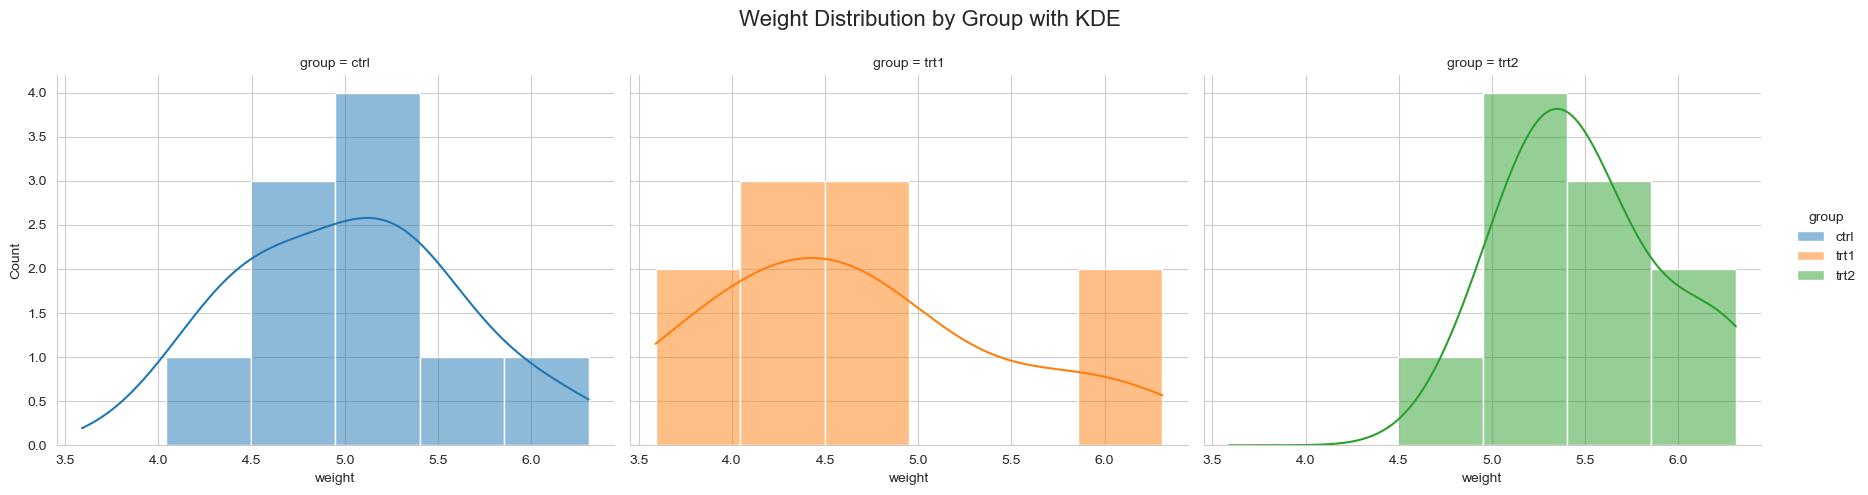

In [12]:
# Apply Seaborn's whitegrid style
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_style("whitegrid")

# Create a displot for the 'weight' distribution, differentiated by 'group'
# https://seaborn.pydata.org/generated/seaborn.displot.html
sns.displot(data=df_plant_growth, x="weight", hue="group", col="group", kde=True, height=5, aspect=1.2)

# Add title for each subplot
plt.subplots_adjust(top=0.85)  # Adjust the spacing to accommodate titles
plt.suptitle("Weight Distribution by Group with KDE", fontsize=16)

# Show the plot
plt.show()

From this observation, the three distributions, one for each group, appear to be **_normally distributed_** and, at least, **_trt1 and trt2 have different means_**. These characteristics will be further analyzed in the next section when we perform an independent t-test and an ANOVA test.

Another useful graph is the **KDE plot**, which can show the overlapping distributions of the three groups. The KDE plot is created using the [`kdeplot()` [31]](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) function in Seaborn. This function provides a smooth estimate of the probability density function for each group, making it easier to compare the overall **shape**, **spread**, and **central tendency** of the distributions.

Text(0, 0.5, 'Density')

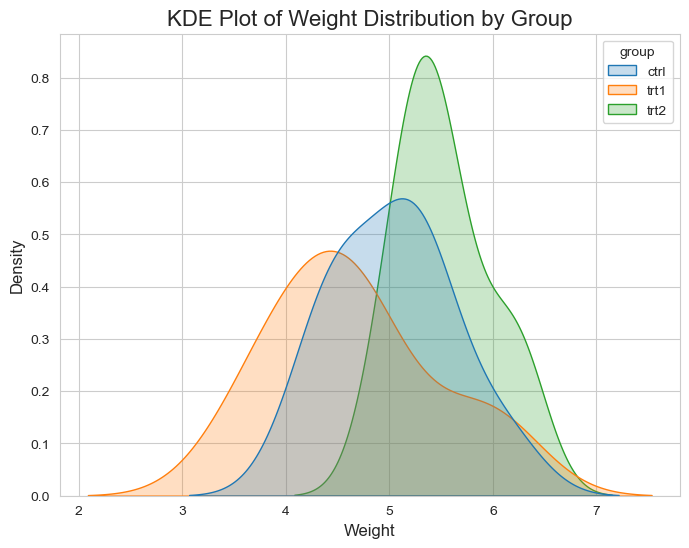

In [13]:
# Create a KDE plot for the 'weight' distribution, differentiated by 'group'

# Set the figure size
plt.figure(figsize=(8, 6))  
# Create the graph
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
sns.kdeplot(data=df_plant_growth, x="weight", hue="group", fill=True, common_norm=False)

# Add title and labels
plt.title("KDE Plot of Weight Distribution by Group", fontsize=16)
plt.xlabel("Weight", fontsize=12)
plt.ylabel("Density", fontsize=12)

From the above graph the data looks normally distributed but is not clear if they have the same mean.

### **4. T-test** <a class="anchor" id="4"></a>

#### **4.1 T-test - definition and general assumptions** <a id="section_4_1"></a>

#### <span style="color: darkblue;"> Defiinition</span>

A **t-test** [[32]](https://datatab.net/tutorial/t-test) [[33]](https://www.scribbr.com/statistics/t-test/) is a statistical test used to compare the means of two groups to determine if they are significantly different from each other. It helps assess whether the differences between the two groups are likely due to chance or if they reflect a real, statistically significant difference.

A t-test can only be used when comparing the means of two groups (i.e., a pairwise comparison). If you want to compare more than two groups, or if you want to perform multiple pairwise comparisons, an ANOVA or post-hoc test should be used.

#### <span style="color: darkblue;"> Assumptions of a t-test</span>

The t-test is a parametric test, meaning it makes assumptions about your data, similar to other parametric tests. 
In order for the results of parametric tests to be valid, the following four assumptions should be met: [[34]](https://www.statology.org/parametric-tests-assumptions/): 

1. **Normality**. Data in each group should be normally distributed
2. **Equal Variance**. Data in each group should have approximately equal variance.
3. **Independence**. Data in each group should be randomly and independently sampled from the population.
4. **No Outliers**. There should be no extreme outliers.

These assumptions may be further extended depending on the type of t-test being conducted.

#### <span style="color: darkblue;"> Types of t-tests</span>

There are different types of t-tests, each with slightly different assumptions [[33]](https://www.scribbr.com/statistics/t-test/):

- **Independent t-test (Two-Sample t-test):** Used when comparing the means of two independent groups (e.g., comparing the test scores of two different classes).
  
- **Paired t-test:** Used when the two groups are related or paired in some way (e.g., measuring the same individuals before and after a treatment).
  
- **One-Sample t-test:** Used when comparing the mean of a single group to a known value (e.g., testing if the average height of a sample differs from a population mean).


<div style="text-align:center;">
 <img src="img\What-type-of-t-test-should-I-use.webp" width="700">
</div>

<div style="text-align:center;">
  <a href="https://www.scribbr.com/statistics/t-test/"><i>[Fig. 1] - Types of T-TEST </i></a>
</div>

#### **4.2 Indipendent T-test** <a id="section_4_2"></a>

In the **PlantGrowth** dataset, it is assumed that the groups are independent. It contains the weights measured from 30 samples, divided into 3 groups of 10 plants each, where the plants have been subjected to no treatment or 2 different types of treatment. As a result, the groups are not related to each other. Therefore, the test that best applies to them is the independent t-test.

##### **4.2.1 Indipendent T-tes: assumptions** <a id="section_4_2_2"></a>

The <span style="color: darkred;"> assumptions</span> [[35]](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php) for conducting this test are:


1. **Continuous Dependent Variable**  
   Your dependent variable should be measured on a continuous scale (e.g., interval or ratio level). Examples include time, IQ scores, exam performance, or weight.

2. **Two Independent Groups**  
   Your independent variable should consist of two categorical, independent groups. Examples include gender (male or female), employment status (employed or unemployed), or smoking status (yes or no).

3. **Independence of Observations**  
   There must be no relationship between observations within or between the groups. This is a study design issue. Each participant should belong to only one group.

4. **No Significant Outliers**  
   Your data should not contain significant outliers, as they can negatively affect the results of the t-test. Outliers are data points that do not follow the usual pattern of the data.

5. **Normality of Dependent Variable**  
   The dependent variable should be approximately normally distributed in each group.

6. **Homogeneity of Variances**  
   The variances of the dependent variable should be similar across the groups. This can be tested using Levene’s test for homogeneity of variances.


##### **4.2.2 Indipendent T-tes: How it works** <a id="section_4_2_3"></a>

Once the assumptions have been verified and it has been decided that an indipendent T-test can be conducdet, here the steps that need to be follow [[36]](https://www.mathandstatistics.com/learn-stats/hypothesis-testing/independent-samples-t-test-by-hand):


1. **State the Hypotheses**  

   - <span style="color: darkred;"> Null Hypothesis (H₀):</span> There is no significant difference between the means of the two groups.
   - <span style="color: darkred;"> Alternative Hypothesis (H₁):(H₀)</span> There is a significant difference between the means of the two groups.

2. **Select Significance Level (α)**

   Choose a significance level (commonly $\alpha$ = 0.05), which defines the probability threshold below which you will reject the null hypothesis.

2. **Calculate the Sample Means (x̄₁ and x̄₂)**

   $$\bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i$$
   Where $\bar{X}$ s the sample mean (the average of the sample data), $n$ is the number of observations (sample size), and $x_i$ represents each individual data point in the sample.

3. Calculate the **Sample Variance**

   The Sample variance measures the average squared deviation of each data point from the sample mean, providing an estimate of the data's spread or dispersion.
   $$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{X})^2$$
   Where $s^2$ is the sample variance,$n$ is the number of data point, $x_i$ represents each individual data point and $\bar{X})^2$ is the sample mean.

4. **Calculate the t-statistic**

   The t-statistic tells us how large the difference is between the means of two groups in relation to the variability in the data. The larger the t-statistic, the more likely it is that the difference observed is real and not due to random chance.
   For an independent t-test, the t-statistic is calculated using the following formula:
   $$ t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$
   Where:
      - $\bar{X_1}$ and $\bar{X_2}$ are the sample means of the two groups.
      - $s_1^2$ and $s_2^2$ are the variances of the two groups.
      - $n_1$ and $n_2$ are the sample sizes of the two groups.

5. Calculate the **degree of freedom**:

   In statistics, degrees of freedom (df) refers to the number of independent values or quantities that can vary in an analysis without breaking any constraints.
   The degrees of freedom (df) for an independent t-test can be calculated using the formula [[37]](https://www.scribbr.com/statistics/degrees-of-freedom/) [[38]](https://www.statology.org/calculate-degrees-of-freedom-for-t-test/):

   $$df = n_1 + n_2 - 2$$

   Where $n_1$ s the sample size of Group 1 ans Where $n_2$ s the sample size of Group 2.

6. Find the **Critical t-value**

   The critical value is a threshold used in hypothesis testing to determine whether the test statistic (in this case, the t-statistic) is significantly different from the null hypothesis, given a specified significance level $\alpha$ (typically α=0.05) and the calculated degrees of freedom (df).

   The formula for the critical value is:
   $${cv} = t_{\alpha/2, \, \text{df}}$$

   Where $\alpha$ is the significance level and ${df}$ is the degrees of freedom.

   The critical value can be find using a [t-distribution table [39]](https://www.statology.org/paired-t-test-by-hand/) [[40]](https://www.statology.org/t-distribution-table/) [[41]](https://www.statisticshowto.com/probability-and-statistics/find-critical-values/t-critical-value/) for a defined α and df.
   Alternatively, it can be calculated in Python using the `scipy` library.

7. Find the **p_value** (optional as the critical value itsed can be used to make a decision.)

   For a two-tailed test, as the current test, the p-value is the area in both tails of the t-distribution curve beyond the critical value calculated t-statistic. This represents the probability of observing a value as extreme as the t-statistic (in both directions). Small p-values provide evidence against the null hypothesis. The smaller (closer to 0) the p-value, the stronger is the evidence against the null hypothesis [[42]](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Hypothesis-Tests/Introduction-to-Hypothesis-Testing/Critical-Value-and-the-p-Value-Approach/index.html) [[43]](https://online.stat.psu.edu/stat462/node/253/).

   The P value can be calculate from a T-Distribution  table using the t statistic and the degree of freedom previously calculate [[44]](https://www.reneshbedre.com/blog/how-to-calculate-p-value.html) [[45]](https://www.statology.org/how-to-calculate-a-p-value-from-a-t-test-by-hand/). 

<div style="text-align:center; margin-top:20px;">
  <img src="img\index.png" width="500">
</div>

<div style="text-align:center; margin-top:10px; margin-bottom:10px;">
  <a href="https://online.stat.psu.edu/stat462/node/253/"><i>[Fig. 2] - p and critical value</i></a>
</div>

9. **Decide if reject the null hypotesis**.

   Using the <span style="color: darkred;">Critical Value </span>: we compare the absolute value of the test statistic (|t|) to the critical value (cv). 
   - If |t| > cv, we reject the null hypothesis. The null hypothesis suggests there is no difference between the two paired groups (i.e., the mean difference is 0).

   Using the <span style="color: darkred;">P-Value </span>: we compare the P-value to the significance level (α).
   - If the P-value ≤ α, we reject the null hypothesis.

### **5. Perform the indipendent T-test** <a class="anchor" id="5"></a>

#### **5.1 Check the assumptions** <a id="5_1"></a>

As previously explained in Section 3.2 PlantGrowth dataset - Data exploration and cleaning of this assignment, in order to perform an independent t-test, six assumptions need to be verified. Three of these assumptions can be immediately assumed as true:

1. **Continuous Dependent Variable**: This assumption holds because weight, which is the dependent variable for the groups `trt1` and `trt2`, is continuous.

2. **Two Independent Groups**: The independent variable consists of two categorical, independent groups (`trt1` and `trt2`). These groups are distinct.

3. **Independence of Observations**: There is no relationship between the observations, and each plant belongs to only one group. This ensures that the observations are independent of one another.

Regarding the remaining three assumptions — **No Significant Outliers**, **Normality of the Dependent Variable**, and **Homogeneity of Variances** — we will verify them in the next sections. For simplicity, **since the assumptions for the ANOVA test are the same, we will include ctrl in the assumptions verification**.

##### **5.1.1. Assumption 4: No Significant Outliers** <a id="5_1_1"></a>

In this analysis, we will use two methods to check for outliers across trt1, trt2, and ctrl [[46]](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/):

1. Visualization Techniques:
     - We will first visualize the distributions of the data using **box plots, violin plots, and strip plots**. These visualizations will help us visually inspect for potential outliers by showing the spread of the data, including any values that fall outside the typical range (i.e., points that are distant from the main cluster of data).
2. **Interquartile Range (IQR)** Test:
    - In addition to visualization, we will apply the IQR test to quantify outliers. The IQR test identifies outliers as values that fall outside of the range defined by the lower and upper bounds, calculated as 1.5 times the interquartile range (IQR) below the first quartile or above the third quartile. This method provides a more rigorous, statistical way of flagging potential outliers.

#### <span style="color: darkblue;"> Box Plot, scatter plot and violin plot</span>

The following code creates a 2x2 grid of plots to compare plant growth (weight) across treatment groups:

1. **Strip plot** : bult with the function `sns.stripplot`, displays individual data points for each group [[47]](https://pieriantraining.com/understanding-the-seaborm-stripplot-in-python/).
2. **Box plot**: bult with the function `sns.boxplot`, shows the distribution of plant weights with quartiles and outliers [[48]](https://en.wikipedia.org/wiki/Box_plot).
3. **Violin plot**: bult with the function `sns.violinplot`, visualizes the density and distribution of plant weights [[49]](https://en.wikipedia.org/wiki/Violin_plot).
4. **Combined plot**: Merges violin, box, and strip plots to give a comprehensive view of the data.

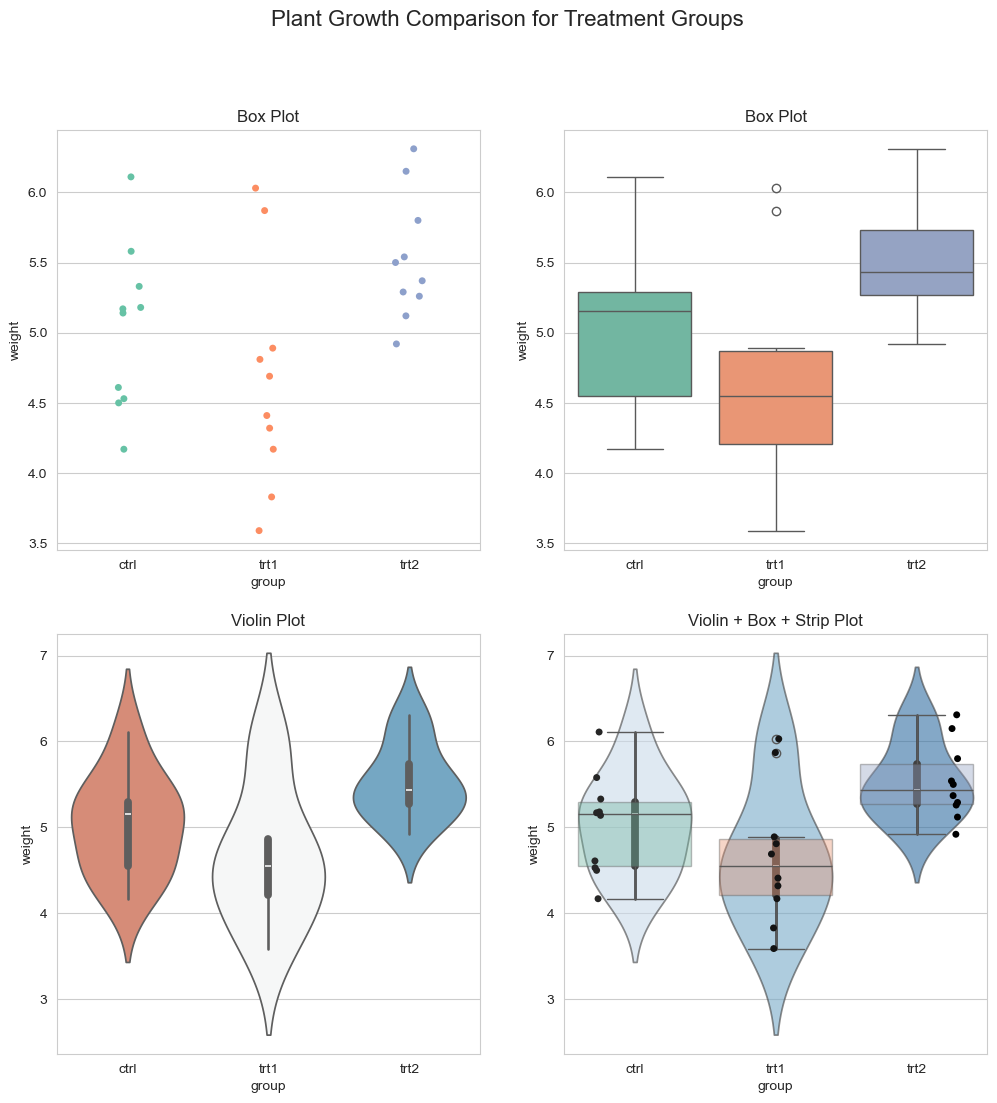

In [14]:


# Set up the figure with 2x2 grid of subplots and adjust the figure size
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Creates a 2x2 grid of subplots with a figure size of 12x12 inches

# Set the title for the entire figure
plt.suptitle('Plant Growth Comparison for Treatment Groups', fontsize=16)

# Plot 1: Strip plot
sns.stripplot(x='group', y='weight', data=df_plant_growth, hue='group', palette='Set2', ax=axs[0, 0])  
axs[0, 0].set_title('Box Plot', fontsize=12)  # Set the title for the first subplot

# Plot 2: Box plot
sns.boxplot(x='group', y='weight', data=df_plant_growth, hue='group', palette='Set2', ax=axs[0, 1])  
axs[0, 1].set_title('Box Plot', fontsize=12)  # Set the title for the second subplot

# Plot 3: Violin plot
sns.violinplot(x='group', y='weight', data=df_plant_growth, hue='group', palette='RdBu', ax=axs[1, 0])  
axs[1, 0].set_title('Violin Plot', fontsize=12)  # Set the title for the third subplot

# Plot 4: Combined Violin, Box, and Strip Plot
sns.violinplot(x='group', y='weight', data=df_plant_growth, hue='group', palette='Blues', alpha=0.6, ax=axs[1, 1])  
sns.boxplot(x='group', y='weight', data=df_plant_growth, hue='group', palette='Set2', boxprops=dict(alpha=0.4), ax=axs[1, 1])  
sns.stripplot(x='group', y='weight', data=df_plant_growth, hue='group', palette='dark:black', dodge=True, ax=axs[1, 1])
axs[1, 1].set_title('Violin + Box + Strip Plot', fontsize=12)  # Set the title for the combined plot


# Show the plot
plt.show()

The graphs indicate that both ctrlr and trtl2 show no outliers, while trtl1 displays a few points outside the whiskers. However, these outliers do not appear to be extreme and likely only marginally exceed the whisker threshold.

This can be further confirmed using the **Interquartile Range (IQR)**. Outliers are typically defined as values that fall outside 1.5 times the IQR above the third quartile or below the first quartile. In this case, the outliers in trtl1 likely only slightly exceed this threshold, suggesting they are not extreme deviations [[50]](https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/).

The following code defines a function, [inspired by  geeksforgeeks[51]](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/), called `find_outliers()` that calculates the first (Q1) and third (Q3) quartiles, computes the IQR as the difference between Q3 and Q1, and then determines the lower and upper bounds for outliers. The function identifies outliers as values outside these bounds.

Finally, the function is called for each treatment group (trt1, trt2, and ctrl) in the df_plant_growth DataFrame, printing the lower and upper bounds and the detected outliers for each group.

In [15]:
# Function to detect outliers using the Interquartile Range (IQR)
# Ref: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

def find_outliers(data_list):
    # Calculate the first quartile (Q1) 
    Q1 = np.percentile(data_list, 25)
    
    # Calculate the third quartile (Q3) 
    Q3 = np.percentile(data_list, 75)
    
    # Calculate the Interquartile Range (IQR) as the difference between Q3 and Q1
    IQR = Q3 - Q1
    
    # Calculate the lower bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    
    # Calculate the upper bound for outliers
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers by checking if values in data_list are outside the lower or upper bounds
    outliers = [x for x in data_list if x < lower_bound or x > upper_bound]
    
    # Return the list of outliers, the lower bound, and the upper bound
    return outliers, lower_bound, upper_bound

In [16]:
# Find outliers for 'trt1' and 'trt2' plant weight data
trt1_outliers, trt1_lower, trt1_upper = find_outliers(df_plant_growth[df_plant_growth['group'] == 'trt1']['weight'])
trt2_outliers, trt2_lower, trt2_upper = find_outliers(df_plant_growth[df_plant_growth['group'] == 'trt2']['weight'])
ctrl_outliers, ctrl_lower, ctrl_upper = find_outliers(df_plant_growth[df_plant_growth['group'] == 'ctrl']['weight'])

# Print the results for treatment group 1 ('trt1')
print("Treatment group 1 ('trt1') - Plant Growth Data:")
print(f"Lower bound: {trt1_lower}")
print(f"Upper bound: {trt1_upper}")
print(f"Outliers: {trt1_outliers}")

# Print the results for treatment group 2 ('trt2')
print("\nTreatment group 2 ('trt2') - Plant Growth Data:")
print(f"Lower bound: {trt2_lower}")
print(f"Upper bound: {trt2_upper}")
print(f"Outliers: {trt2_outliers}")

# Print the results for treatment group 2 ('ctrl')
print("\nTreatment group 2 ('ctrl') - Plant Growth Data:")
print(f"Lower bound: {ctrl_lower}")
print(f"Upper bound: {ctrl_upper}")
print(f"Outliers: {ctrl_outliers}")

Treatment group 1 ('trt1') - Plant Growth Data:
Lower bound: 3.21375
Upper bound: 5.863749999999999
Outliers: [5.87, 6.03]

Treatment group 2 ('trt2') - Plant Growth Data:
Lower bound: 4.566250000000001
Upper bound: 6.4362499999999985
Outliers: []

Treatment group 2 ('ctrl') - Plant Growth Data:
Lower bound: 3.436250000000001
Upper bound: 6.40625
Outliers: []


For trt2 and ctrl, no outliers were detected, while for trt1, the values 5.87 and 6.03 were identified as slightly above the upper bound of the IQR range, which aligns with the observation from the box plot visualization.

However, these outliers are not considered extreme, as they only marginally exceed the whisker threshold. Therefore, they do not require removal from the dataset, and the analysis will proceed as planned.

Further details on outlier identification more information in  [NIST guide on outlier detection [52]](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm).

##### **5.1.2 Assumption 5: Normality** <a id="5_1_2"></a>

In Section 2.3. PlantGrowth Dataset - Data Visualization, we visualized the three groups using histograms and Kernel Density Estimation (KDE) plots. Based on these visualizations, the data in each group appears to be approximately normally distributed. However, to further confirm this assumption, we can also use the following methods:

- **QQ Plot (Quantile-Quantile Plot)**
- **Shapiro-Wilk Test**
- **Kolmogorov-Smirnov Test**


#### <span style="color: darkblue;"> QQ Plot (Quantile-Quantile Plot)</span>

A QQ Plot (Quantile-Quantile Plot) compares the quantiles of the data against the quantiles of a standard normal distribution. If the points on the QQ plot lie approximately along a straight line, this suggests that the data follows a normal distribution. Deviations from the straight line indicate departures from normality [[53]](https://www.statology.org/q-q-plot-normality/).

The following code first filters the df_plant_growth DataFrame to extract the 'weight' data for each group, creating three dedicated variables `trt1_d`, `trt2_d` and `ctrl_d`. It then creates a 1x3 grid of subplots, where each subplot contains a Q-Q plot for one of the groups ('ctrl', 'trt1', 'trt2')/ They compare the data of each group to a normal distribution using `stats.probplot()`, as inspired by [ianmcloughlin_applied_statistics_03_normal [54]](https://github.com/ianmcloughlin/2425_applied_statistics/blob/main/03_normal.ipynb).

In [17]:
# Extract the 'weight' data for each group ('trt1', 'trt2', and 'ctrl') from the DataFrame
trt1_d = df_plant_growth[df_plant_growth['group'] == 'trt1']['weight']  # Data for treatment group 1
trt2_d = df_plant_growth[df_plant_growth['group'] == 'trt2']['weight']  # Data for treatment group 2
ctrl_d = df_plant_growth[df_plant_growth['group'] == 'ctrl']['weight']  # Data for control group


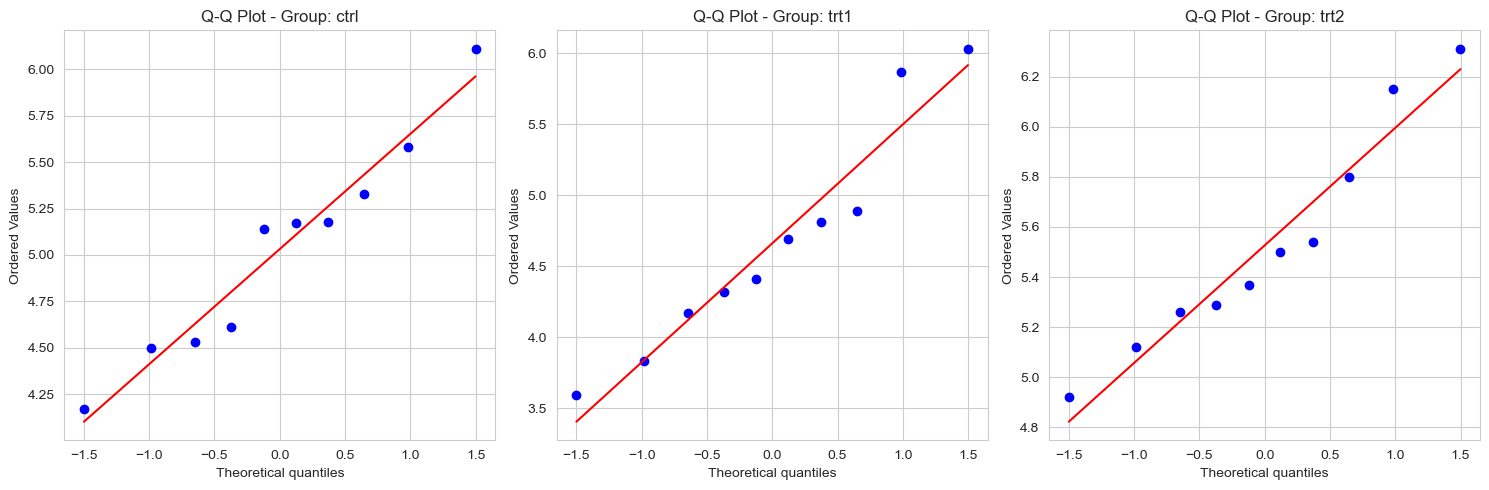

In [18]:
# Set up a figure with 1 row and 3 columns for creating Q-Q plots for each group
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Create a Q-Q plot for the 'ctrl' group and plot it in the first subplot
stats.probplot(ctrl_d, dist='norm', plot=axs[0])  
axs[0].set_title('Q-Q Plot - Group: ctrl')  

# Create a Q-Q plot for the 'trt1' group and plot it in the second subplot
stats.probplot(trt1_d, dist='norm', plot=axs[1])  
axs[1].set_title('Q-Q Plot - Group: trt1')  

# Create a Q-Q plot for the 'trt2' group and plot it in the third subplot
stats.probplot(trt2_d, dist='norm', plot=axs[2]) 
axs[2].set_title('Q-Q Plot - Group: trt2')  

# Adjust the layout to prevent overlap and ensure proper spacing between plots
plt.tight_layout()

# Display the Q-Q plots
plt.show()  

Based on the Q-Q plots, the three groups ('ctrl', 'trt1', and 'trt2') appear to **follow a normal distribution**. 

After examining the histograms, KDE plots and Q-Q plots; we can further confirm the normality of the groups by conducting formal statistical tests, such as the Shapiro-Wilk Test and Kolmogorov-Smirnov Test. 

#### <span style="color: darkblue;">Shapiro-Wilk Test and Kolmogorov-Smirnov Test</span>

The **_Shapiro-Wilk_** test is a statistical test used to assess whether a dataset follows a normal distribution. It compares the observed data with expected values from a normal distribution, calculating the W statistic based on the correlation between the data and normal scores. A key factor in determining normality is the p-value provided by the test: a large p-value (typically greater than 0.05) suggests that the data is normally distributed, while a small p-value (less than 0.05) indicates that the data significantly deviates from normality [[55]](https://medium.com/@maizi5469/10-0-shapiro-wilk-test-5be38fd3c2a6).

The **_Kolmogorov-Smirnov_** test is another statistical test used to compare a sample distribution with a reference distribution, such as the normal distribution. It evaluates the largest difference between the observed cumulative distribution function (CDF) of the sample and the CDF of the reference distribution. The p-value provided by the test is crucial for determining the fit: a large p-value (typically greater than 0.05) suggests that the sample distribution is similar to the reference distribution, while a small p-value (less than 0.05) indicates a significant difference between the two distributions [[56]](https://www.statology.org/kolmogorov-smirnov-test-python/).

The following code performs the **Shapiro-Wilk** and **Kolmogorov-Smirnov (K-S)** tests on the 'weight' data for three groups ('ctrl', 'trt1', 'trt2') to check normality:

1. The significance level (**alpha**) is set to 0.05.
2. For each group, the **Shapiro-Wilk test** is performed using `scipy.stats.shapiro()` [[57]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) and the results are stored in a list for better visualization.
3. Then, the **K-S test** is performed using `scipy.stats.kstest()` [[58]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) with the normal distribution as the reference, and the results are also stored in a separate list.
4. The results (p-values and conclusions) are formatted into tables using the `tabulate` [[59]](https://pypi.org/project/tabulate/) library and printed for easy interpretation.



In [19]:
# Define the significance level
alpha = 0.05  # significance level

# Initialize lists to hold the results for both tests
results_shapiro = []
results_ks = []

# Perform the Shapiro-Wilk and Kolmogorov-Smirnov tests for each group
for group_name in ['ctrl', 'trt1', 'trt2']:
    # Filter the DataFrame to get the weight data for each group
    group_data = df_plant_growth[df_plant_growth['group'] == group_name]['weight']
    
    # Perform the Shapiro-Wilk test
    shapiro_stat, p_value_shapiro = stats.shapiro(group_data)
    p_value_shapiro = round(p_value_shapiro, 3)
    result_shapiro = "YES: The data is not normally distributed." if p_value_shapiro < alpha else "NO: The data may be normally distributed."
    results_shapiro.append([group_name, p_value_shapiro, result_shapiro])
    
    # Perform the Kolmogorov-Smirnov test against a normal distribution
    mean = group_data.mean()
    std = group_data.std()
    ks_stat, p_value_ks = stats.kstest(group_data, 'norm', args=(mean, std))
    p_value_ks = round(p_value_ks, 3)
    result_ks = "YES: The data is not normally distributed." if p_value_ks < alpha else "NO: The data may be normally distributed."
    results_ks.append([group_name, p_value_ks, result_ks])

# Use tabulate to format the results for better presentation
headers = ['Group', 'P-value', 'Reject the null hypothesis?']

# Print the results with headers for both tests
print("==== Shapiro-Wilk Test ====")
table_shapiro = tabulate(results_shapiro, headers=headers, tablefmt='pretty')
print(table_shapiro)

print("\n==== Kolmogorov-Smirnov Test ====")
table_ks = tabulate(results_ks, headers=headers, tablefmt='pretty')
print(table_ks)

==== Shapiro-Wilk Test ====
+-------+---------+-------------------------------------------+
| Group | P-value |        Reject the null hypothesis?        |
+-------+---------+-------------------------------------------+
| ctrl  |  0.747  | NO: The data may be normally distributed. |
| trt1  |  0.452  | NO: The data may be normally distributed. |
| trt2  |  0.564  | NO: The data may be normally distributed. |
+-------+---------+-------------------------------------------+

==== Kolmogorov-Smirnov Test ====
+-------+---------+-------------------------------------------+
| Group | P-value |        Reject the null hypothesis?        |
+-------+---------+-------------------------------------------+
| ctrl  |  0.876  | NO: The data may be normally distributed. |
| trt1  |  0.817  | NO: The data may be normally distributed. |
| trt2  |  0.812  | NO: The data may be normally distributed. |
+-------+---------+-------------------------------------------+


#### <span style="color: darkblue;">Normality: conclusion</span>

Both tests indicate that <span style="color: darkred;">there is no evidence to reject the null hypothesis of the data being normally distributed</span>. Together with the visualization techniques illustrated above, we can conclude that the data from the three groups is normally distributed.


##### **5.1.3 Assumption 6: Homogeneity of Variances** <a id="5_1_3"></a>

The next assumption to verify is **equal variance**, also known as **homogeneity of variance**. This assumption states that different groups or samples in a statistical analysis should have the same variance (or spread) in their data. In other words, the variability in scores or measurements within each group should be roughly the same across all groups being compared [[60]](https://theresearcherlife.com/homogeneity-of-variance/).

A widely used statistical test to assess whether two or more groups have equal variances is **Levene's Test**. Levene's test evaluates the null hypothesis that the samples being compared come from populations with equal variances. If the p-value for Levene's test is greater than 0.05, we fail to reject the null hypothesis, indicating that the variances are not significantly different and that the assumption of homogeneity of variance is met. If the p-value is less than 0.05, we reject the null hypothesis, suggesting that there is a significant difference between the variances [[61]](https://datatab.net/tutorial/levene-test).

Another statistical test to assess equal variances is **Bartlett's Test**. Similar to Levene’s test, if the p-value for Bartlett’s test is greater than 0.05, it indicates that the variances are not significantly different, meaning the assumption of equal variances holds. A p-value less than 0.05 suggests a significant difference in variances.

The following code performs **Levene's Test** using the `stats.levene()` function and **Bartlett’s Test** using the `stats.bartlett()` function on the three groups, then prints the results based on the p-values.

In [20]:
# Perform Levene's Test for Equal Variances
stat, p_value = stats.levene(trt1_d, trt2_d, ctrl_d)

# Output the result of Levene's Test
print("==== Levene's Test for Equal Variances ====\n")
print(f"Statistic: {stat}")
print(f"P-value: {p_value}\n")

# Interpret the result based on the p-value
if p_value > 0.05:
    print("Reject the null hypothesis?")
    print("NO: The data may have equal variances (homogeneity of variance assumption is met).")
else:
    print("Reject the null hypothesis?")
    print("YES: The data may NOT have equal variances (homogeneity of variance assumption is violated).")

==== Levene's Test for Equal Variances ====

Statistic: 1.1191856948703909
P-value: 0.3412266241254737

Reject the null hypothesis?
NO: The data may have equal variances (homogeneity of variance assumption is met).


In [21]:
# Perform Bartlett's Test for Equal Variances
stat, p_value = stats.bartlett(trt1_d, trt2_d, ctrl_d)

# Output the result of Bartlett's Test
print("\n==== Bartlett's Test for Equal Variances ====\n")
print(f"Statistic: {stat}")
print(f"P-value: {p_value}\n")

# Interpret the result based on the p-value
if p_value > 0.05:
    print("Reject the null hypothesis?")
    print("NO: The data may have equal variances (homogeneity of variance assumption is met).")
else:
    print("Reject the null hypothesis?")
    print("YES: The data may NOT have equal variances (homogeneity of variance assumption is violated).")



==== Bartlett's Test for Equal Variances ====

Statistic: 2.8785737872360935
P-value: 0.23709677363455822

Reject the null hypothesis?
NO: The data may have equal variances (homogeneity of variance assumption is met).


#### <span style="color: darkblue;">Homogeneity of Variances: conclusion</span>

Since both statistical tests indicate no significant difference in variances, we can conclude that <span style="color: darkred;">the assumption of homogeneity of variances is met.</span>

#### **5.2. Perform the test** <a id="5_2"></a>

Now that we have verified that the groups of data (trt1 and trt2) satisfy all the assumptions necessary for performing an independent t-test, we can proceed with executing the test.

The test will be performed using the `stats.ttest_ind()` [[62]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) function from the SciPy stats library. Based on the p-value, the result will be interpreted and printed.

In [22]:
# Perform an independent t-test
stat, p_value = stats.ttest_ind(trt1_d, trt2_d, equal_var=True)  # Set equal_var=False if variances are unequal

# Print the results
print("Independent t-test results:")
print(f"T-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject H₀: The means are significantly different.")
else:
    print("Fail to reject H₀: The means are not significantly different.")

Independent t-test results:
T-statistic: -3.0100985421243616
P-value: 0.0075184261182198574
Reject H₀: The means are significantly different.


#### <span style="color: darkblue;">Independent t-test: conclusion</span>

As the p-value for the independent test between **trt1** and **trt2** is **0.0075**, which is less than the typical significance level of 0.05, there is **sufficient evidence to reject the null hypothesis**. This suggests that the means of **trt1** and **trt2** are **significantly different**.

This conclusion is further supported by the visualization techniques used in Section 4.1 ("Check the Assumptions"), such as the **box plot**, **violin plot**, and **scatter plot**, all of which visually indicate differences in means between the two groups.

### **6. ANOVA Test** <a class="anchor" id="6"></a>

#### **6.1 ANOVA: definition and general assusmptions** <a id="6_1"></a>

#### <span style="color: darkblue;"> Defiinition</span>

The **One-Way Analysis of Variance (ANOVA)** is a statistical method used to determine if there are significant differences between the means of **two or more independent (unrelated)** groups. Although it can be used with just two groups, it is more commonly applied when comparing **at least three groups**. For example, you could use a one-way ANOVA to analyze whether customer satisfaction scores differ based on the type of customer service channel used, such as phone support, live chat, and email support [[63]](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php).

It’s important to understand that the one-way ANOVA is an **omnibus test**, meaning it only tells you that at least two groups are different, but does not specify which ones. To identify which specific groups differ from one another, you would need to conduct a **Tukey's Honestly Significant Difference (HSD) test** [[64]](https://www.statology.org/tukey-test-python/). 

- **Null Hypothesis**: All group means are equal.
- **Alternative Hypothesis**: At least one group mean is different.

#### <span style="color: darkblue;"> Assumptions of a t-test</span>

Before conducting a one-way ANOVA, it is important to ensure that your data meet certain assumptions. These assumptions help ensure the validity and reliability of the results. If these assumptions are violated, the results of the test may be misleading. Below are the six key assumptions that should be checked [[63]](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php):

1. **Continuos Deoendent Variable**: The dependent variable must be continuous and measured at the interval or ratio level.  
   *Example*: Exam scores (e.g., scores out of 100 on a math test), time spent on a task (in minutes), or the weight of plants after a treatment.

2. **Independent Variable**: The independent variable must consist of two or more categorical, independent groups.  
   *Example*: Grouping participants by diet type (e.g., Vegan, Low-carb, High-protein) to compare the effect of diet on health metrics.

3. **Independence of Observations**: Each group should have independent observations, meaning no participant should appear in more than one group.  
   *Example*: In a study on stress levels, one group could be participants who work night shifts, and another group could be day shift workers, but no individual can be in both groups.

4. **No Significant Outliers**: There should be no extreme data points that significantly deviate from the general pattern of data within each group.  
   *Example*: In a study measuring employee productivity, an extremely high productivity score (e.g., a person completing 50 tasks in an hour when the rest complete 5-10) would be considered an outlier.

5. **Normality**: The dependent variable should be approximately normally distributed within each group. The one-way ANOVA is fairly robust to moderate violations of this assumption.  
   *Example*: In a study measuring test scores across three different teaching methods, you would check the normality of the distribution of scores for each teaching method group.

6. **Homogeneity of Variances**: The variances within each group should be approximately equal. Levene’s test can be used to check this assumption.  
   *Example*: In a study comparing the effect of three different types of exercise programs (Yoga, Running, Weightlifting), you would check if the variability in results (e.g., improvement in fitness levels) is similar across the three groups.

If your data violate any of these assumptions, you may need to adjust your analysis or use alternative tests, like a Welch ANOVA for unequal variances.

#### **6.2 ANOVA: Check the Assumption Satisfaction** <a id="6_2"></a>

We can assume that all the assumptions are satisfied:

1. **Continuous Dependent Variable**: This assumption holds because weight, which is the dependent variable for the groups `trt1`, `trt2` and `ctrl`, is continuous.
2. **Two Independent Groups**: The independent variable consists of three categorical, independent groups (`trt1`, `trt2` and `ctrl`). These groups are distinct.
3. **Independence of Observations**: There is no relationship between the observations, and each plant belongs to only one group. This ensures that the observations are independent of one another.
4. **No Significant Outliers**: This assumption has already been verified in Section 4.1.1: Assumption 3 - No Significant Outliers.
5. **Normality**: This assumption has already been verified in Section 4.1.2: Assumption - Normality.
6. **Homogeneity of Variances**: This assumption has already been verified in Section 4.1.3: Assumption 6 - Homogeneity of Variances.

#### **6.3 ANOVA: Test execution** <a id="6_3"></a>

The ANOVA test can be performed using the `f_oneway()` function from the **SciPy** library [[65]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#f-oneway).

The **p-value** plays a crucial role in interpreting the results. If the p-value is **less than 0.05**, we have sufficient evidence to reject the null hypothesis (which states that all group means are equal). On the other hand, if the p-value is **greater than 0.05**, we fail to reject the null hypothesis, suggesting that there is no significant difference between the group means.

However, as previosuly said, while the ANOVA test can indicate that at least one group mean is different (if the null hypothesis is rejected), it does not tell us specifically **which** groups are different. 


In [23]:
# Perform ANOVA test to compare means across the three groups
f_statistic, p_value = stats.f_oneway(trt1_d, trt2_d, ctrl_d)

# Display the results of the ANOVA
print("=== ANOVA Results ===")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of the results based on the p-value
if p_value < 0.05:
    print("The p-value is less than 0.05, so we reject the null hypothesis: At least one group mean is different.")
else:
    print("The p-value is greater than or equal to 0.05, so we fail to reject the null hypothesis: All group means are equal.")

=== ANOVA Results ===
F-statistic: 4.8461
P-value: 0.0159
The p-value is less than 0.05, so we reject the null hypothesis: At least one group mean is different.


#### <span style="color: darkblue;">ANOVA: conclusion</span>

Based on the ANOVA results, the **F-statistic** is 4.8461, and the **p-value** is 0.0159. Since the p-value is less than the significance level of 0.05, we **reject the null hypothesis**. This means that there is sufficient evidence to conclude that **at least one group mean is significantly different** from the others.

#### **6.4 ANOVA: Tukey's HSD Test** <a id="6_4"></a>

Tukey’s Honest Significant Difference (HSD) test is a **post-hoc analysis** used to perform **pairwise comparisons** between group means after an **ANOVA** (Analysis of Variance) test. While ANOVA can tell us if there is a significant difference between group means, it does not specify which specific groups are different. Tukey's HSD test helps identify these specific differences by comparing each pair of group means while controlling for the Type I error rate.

The main advantage of Tukey’s test is that it controls the **family-wise error rate**, meaning it reduces the probability of incorrectly rejecting a null hypothesis when making multiple comparisons. This is especially important when comparing multiple groups to ensure that the conclusions drawn are reliable and valid [[64]](https://www.statology.org/tukey-test-python/) [[66]](https://www.statology.org/family-wise-error-rate/) [[67]](https://www.statology.org/anova-post-hoc-tests/).

Tukey’s test provides a clear output that includes the mean differences between groups, the **p-values**, and **confidence intervals**. These results help researchers determine which groups are significantly different from each other. 

The **p-value** indicates whether the observed difference between groups is statistically significant. If the **p-value** is less than 0.05 (typically the threshold for significance), it suggests that the difference between the groups is unlikely to be due to random chance, and thus, the null hypothesis (that all group means are equal) is rejected. On the other hand, if the **p-value** is greater than 0.05, we fail to reject the null hypothesis, implying no significant difference between the groups.

The **confidence interval (CI)** provides a range of values within which the true difference between the groups is likely to fall. If the **confidence interval does not include 0**, it suggests a significant difference between the groups. This is because a CI that spans 0 would mean that it's plausible that the difference in means is actually zero (indicating no real difference between the groups). Therefore, when interpreting the Tukey test results, if the p-value is below 0.05 and the CI does not include 0, we can confidently conclude that the groups being compared are **significantly different**. Conversely, if the p-value is above 0.05 or the CI includes 0, we conclude that there is no significant difference between the groups [[68]](https://www.isixsigma.com/dictionary/tukeys-1-way-anova/) [[69]](https://fastercapital.com/content/Tukey-s-HSD--Post-Hoc-Analysis-after-ANOVA.html#Interpreting-the-Results).

The following code performs Tukey's HSD test using the function `pairwise_tukeyhsd()` [[70]](https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html), with `alpha=0.05` to determine statistical significance. It compares the `weight` (dependent variable) across different categories of the `group` (independent variable) in the `df_plant_growth` DataFrame. Based on the `alpha` value, the null hypothesis for each pair of groups will either be rejected or accepted.

In [24]:
# Perform Tukey's HSD test
# https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html
tukey = pairwise_tukeyhsd(endog=df_plant_growth['weight'],
                          groups=df_plant_growth['group'],
                          alpha=0.05)

# Display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


#### <span style="color: darkblue;">Tukey's HSD Test: conclusion</span>

There is **no significant difference** between the `ctrl` and `trt1` groups, nor between the `ctrl` and `trt2` groups. Both comparisons have **p-values greater than 0.05**, indicating that we **fail to reject the null hypothesis** for these pairs. Additionally, the 95% confidence intervals for both comparisons ([-1.0622, 0.3202] for `ctrl` vs. `trt1` and [-0.1972, 1.1852] for `ctrl` vs. `trt2`) include zero, which supports the conclusion that the differences are not statistically significant.
  
However, a **significant difference** was found between the `trt1` and `trt2` groups, with a **p-value of 0.012**, which is less than 0.05, indicating that we **reject the null hypothesis**. The 95% confidence interval for this comparison ([0.1738, 1.5562]) does **not include zero**, providing further evidence that the mean difference between `trt1` and `trt2` is statistically significant.

### **7. The Benefits of ANOVA Over Multiple T-Tests for Group Comparison Analysis** <a class="anchor" id="7"></a>

The main reason ANOVA is preferred when analyzing more than two groups is to **reduce the risk of increasing the Type I error** when conducting multiple t-tests. Each time a t-test is performed, there is a 5% chance of making a Type I error. If two t-tests are run on the same data, the risk of making a Type I error increases to 10%. While the exact formula for calculating the new error rate across multiple t-tests is more complex, a rough estimate shows that running three t-tests increases the error rate to 14.3%, and so on. These compounded errors are unacceptable in statistical analysis [[71]](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php) [[72]](https://www.quora.com/What-are-the-advantages-of-using-analysis-of-variance-ANOVA-over-t-tests-for-comparing-multiple-groups). 

ANOVA, however, controls for this risk, ensuring that the overall Type I error rate stays at 5%. This gives greater confidence that statistically significant results are not simply due to conducting numerous tests.

Another advantage of ANOVA is its **efficiency**. Running several t-tests to compare every possible pair of groups is computationally expensive and harder to interpret. For example, with five groups, you would need to conduct 10 pairwise t-tests, which can become unwieldy. ANOVA, on the other hand, allows you to test the overall differences between groups at once, without needing to compare each pair separately. 

This makes ANOVA not only more efficient but also simplifies both the analysis and interpretation of the results.

If the ANOVA test determines that not all the group means are equal, you can further explore the differences using **post hoc tests**. These tests help identify which specific groups differ from each other. Post hoc tests are particularly useful when you want to make pairwise comparisons between groups after finding a significant difference in the overall ANOVA test. This approach helps maintain the overall error rate at an acceptable level while providing deeper insights into where the differences lie.

In summary, ANOVA is preferred over multiple t-tests for analyzing more than two groups because it controls the Type I error rate and is computationally more efficient. Additionally, if necessary, post hoc tests can be applied after ANOVA to further investigate the specific group differences.

### **References** <a class="anchor" id="r"></a>References Project 
-	[1] [pandas documentation]( https://pandas.pydata.org/pandas-docs/stable/#pandas-documentation)
-	[2] [Matplotlib](https://matplotlib.org/stable/contents.html)
-	[3] [seaborn](https://seaborn.pydata.org/)
-	[4] [scipy.stats]( https://docs.scipy.org/doc/scipy/reference/stats.html)
-	[5] [os](https://docs.python.org/3/library/os.html)
-	[6] [Requests](https://docs.python-requests.org/en/latest/)
-	[7] [Numpy](https://numpy.org/doc/stable/)
-	[8] [Tabulate](https://pypi.org/project/tabulate/)
-	[9] [Statsmodels]( https://www.statsmodels.org/stable/index.html)
-	[10] [PlantGrowth R dataset](https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv)
-	[11] [Python | os.path.exists() method](https://www.geeksforgeeks.org/python-os-path-exists-method/)
-	[12] [andrewbeattycourseware/wsaa-course-material](https://github.com/andrewbeattycourseware/wsaa-course-material/blob/main/labs/Lab04.1%20requests.pdf)
-	[13] [Make a Request](https://requests.readthedocs.io/en/latest/user/quickstart/#make-a-request)
-	[14] [response.status_code – Python requests]( https://www.geeksforgeeks.org/response-status_code-python-requests/)
-	[15] [andrewbeattycourseware/pands-course-material](https://github.com/andrewbeattycourseware/pands-course-material/blob/main/jupyternotebooks/topic07-files.ipynb)
-	[16] [cliffsnotes](https://www.cliffsnotes.com/tutors-problems/Computer-Science/48544301-The-PlantGrowth-dataset-in-R-contains-information-from-an/)
-	[17] [pandas read_csv() Tutorial: Importing Data](https://www.datacamp.com/tutorial/pandas-read-csv)
-	[18] [Python | Pandas Dataframe/Series.head() method](https://www.geeksforgeeks.org/python-pandas-dataframe-series-head-method/)
-	[19] [pandas.Series.unique](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html)
-	[20] [Cecilia8989_fund_data_analysis](https://github.com/Cecilia8989/fund_data_analysis/blob/main/project.ipynb)
-	[21] [How to use .format in python to print out the data shape](https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape)
-	[22] [sparkbyexamples_merge(join)](https://sparkbyexamples.com/pandas/pandas-join-dataframes-on-columns/)
-	[23] [Exploratory Data Analysis on Iris Dataset](https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/)
-	[24] [Pandas DataFrame duplicated() Method](https://www.w3schools.com/python/pandas/ref_df_duplicated.asp)
-	[25] [Exploratory Data Analysis Python and Pandas with Examples](https://datascientyst.com/exploratory-data-analysis-pandas-examples/)
-	[26] [Python type()](https://www.programiz.com/python-programming/methods/built-in/type)
-	[27] [pandas.DataFrame.describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
-	[28] [seaborn.displot](https://seaborn.pydata.org/generated/seaborn.displot.html)
-	[29] [https://docs.kanaries.net/topics/Seaborn/seaborn-displot](https://docs.kanaries.net/topics/Seaborn/seaborn-displot)
-	[30] [Overview of seaborn plotting functions](https://seaborn.pydata.org/tutorial/function_overview.html)
-	[31] [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)
-	[32] [t-Test](https://datatab.net/tutorial/t-test)
-	[33] [An Introduction to t Tests | Definitions, Formula and Examples](https://www.scribbr.com/statistics/t-test/)
-	[34] [The Four Assumptions of Parametric Tests](https://www.statology.org/parametric-tests-assumptions/)
-	[35] [Independent t-test using SPSS Statistics](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php)
-	[36] [Independent Samples T-Test By Hand](https://www.mathandstatistics.com/learn-stats/hypothesis-testing/independent-samples-t-test-by-hand)
-	[37] [How to Find Degrees of Freedom | Definition & Formula]( https://www.scribbr.com/statistics/degrees-of-freedom/)
-	[38] [How to Calculate Degrees of Freedom for Any T-Test]( https://www.statology.org/calculate-degrees-of-freedom-for-t-test/)
-	[39] [How to Perform a Paired t-Test by Hand](https://www.statology.org/paired-t-test-by-hand/)
-	[40] [t-Distribution Table](https://www.statology.org/t-distribution-table/)
-	[41] [T Critical Value: Easy Definition, Calculating]( https://www.statisticshowto.com/probability-and-statistics/find-critical-values/t-critical-value/)
-	[42] [The Critical Value and the p-Value Approach to Hypothesis Testing](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Hypothesis-Tests/Introduction-to-Hypothesis-Testing/Critical-Value-and-the-p-Value-Approach/index.html)
-	[43] [Hypothesis Testing](https://online.stat.psu.edu/stat462/node/253/)
-	[44] [How to Calculate p Value by Hand]( https://www.reneshbedre.com/blog/how-to-calculate-p-value.html?utm_content=cmp-true)
-	[45] [How to Calculate a P-Value from a T-Test By Hand]( https://www.statology.org/how-to-calculate-a-p-value-from-a-t-test-by-hand/)
-	[46] [Detect and Remove the Outliers using Python](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/)
-	[47] [Understanding the seaborm stripplot in Python](https://pieriantraining.com/understanding-the-seaborm-stripplot-in-python/)
-	[48] [Box plot](https://en.wikipedia.org/wiki/Box_plot)
-	[49] [Violin plot](https://en.wikipedia.org/wiki/Violin_plot)
-	[50] [Interquartile Range to Detect Outliers in Data](https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/)
-	[51] [Detect and Remove the Outliers using Python]( https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/)
-	[52] [What are outliers in the data?](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)
-	[53] [How to Use Q-Q Plots to Check Normality](https://www.statology.org/q-q-plot-normality/)
-	[54] [ianmcloughlin_2425_applied_statistics](https://github.com/ianmcloughlin/2425_applied_statistics/blob/main/03_normal.ipynb)
-	[55] [10.0 Shapiro-Wilk test](https://medium.com/@maizi5469/10-0-shapiro-wilk-test-5be38fd3c2a6)
-	[56] [How to Perform a Kolmogorov-Smirnov Test in Python](https://www.statology.org/kolmogorov-smirnov-test-python/)
-	[57] [shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)
-	[58] [kstest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html)
-	[59] [python-tabulate](https://pypi.org/project/tabulate/)
-	[60] [Homogeneity of Variance: A Key Assumption in Statistical Analysis](https://theresearcherlife.com/homogeneity-of-variance/)
-	[61] [Levene Test](https://datatab.net/tutorial/levene-test)
-	[62] [ttest_ind
](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
-	[63] [One-way ANOVA in SPSS Statistics](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php)
-	[64] [How to Perform Tukey’s Test in Python](https://www.statology.org/tukey-test-python/)
-	[65] [f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#f-oneway)
-	[66] [What is the Family-wise Error Rate?)]( https://www.statology.org/family-wise-error-rate/)
-	[67] [A Guide to Using Post Hoc Tests with ANOVA]( https://www.statology.org/anova-post-hoc-tests/)
-	[68] [Tukey’s (1-way ANOVA): See the Difference in Your Data Sets](https://www.isixsigma.com/dictionary/tukeys-1-way-anova/)
-	[69] [Tukey's HSD: Post Hoc Analysis after ANOVA](https://fastercapital.com/content/Tukey-s-HSD--Post-Hoc-Analysis-after-ANOVA.html#Interpreting-the-Results)
-	[70] [statsmodels.stats.multicomp.pairwise_tukeyhsd](https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)
-	[71] [One-way ANOVA (cont...)](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php)
-	[72] [What are the advantages of using analysis of variance (ANOVA) over t-tests for comparing multiple groups?](https://www.quora.com/What-are-the-advantages-of-using-analysis-of-variance-ANOVA-over-t-tests-for-comparing-multiple-groups)
